In [2]:
pip install tensorflow


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.

In [5]:
pip install keras

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [4]:
from keras.datasets import mnist
data = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [5]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

In [6]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [8]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [31]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [36]:
result=lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0246 - val_accuracy: 0.9920
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0216 - val_accuracy: 0.9934
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0150 - val_accuracy: 0.9954
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0145 - val_accuracy: 0.9952


In [37]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.0520 - accuracy: 0.9846


[0.05203685909509659, 0.9846000075340271]

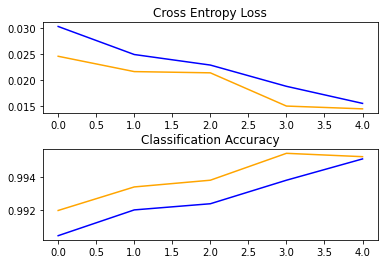

In [43]:
# plot loss
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(result.history['loss'], color='blue', label='train')
plt.plot(result.history['val_loss'], color='orange', label='test')



# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(result.history['accuracy'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color='orange', label='test')
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

Matplotlib is building the font cache; this may take a moment.


5


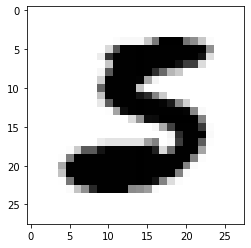

In [12]:
%matplotlib inline 
image_index = 7777
print(test_y[image_index])
plt.imshow(test_x[image_index], cmap='Greys')

In [18]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
pred = lenet_5_model.predict(test_x[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

5


In [44]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img_path='C:/Users/reliance/Downloads/test_image_8.jpeg'
my_img=load_img(img_path, target_size=(28,28), grayscale=True)
#image convert to array
my_img=img_to_array(my_img)
my_img=my_img.reshape(1, 28, 28, 1)
#pixel prep.
my_img=my_img.astype('float32')
my_img=my_img/255.0
pred = lenet_5_model.predict(my_img)
print(pred.argmax())

8
